In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
# Import the Yelp reviews file but only include rows that where the business is located in AZ and is a business. 
reviews = pd.read_csv('./reviews_oh.csv') 

In [3]:
# check the head
reviews.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18


In [4]:
# check the shape
reviews.shape

(321345, 9)

In [5]:
# check for null values 
reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [6]:
# check datatypes 
reviews.dtypes

review_id      object
user_id        object
business_id    object
stars           int64
useful          int64
funny           int64
cool            int64
text           object
date           object
dtype: object

In [7]:
# check for non zero values
reviews.astype(bool).sum(axis=0)

review_id      321345
user_id        321345
business_id    321345
stars          321345
useful         171948
funny           86252
cool            95895
text           321345
date           321345
dtype: int64

In [8]:
# Check when the reviews where writtten 

In [9]:
# create datetime column and a year column to get an overview of when the reviews were submitted
reviews['datetime'] = pd.to_datetime(reviews['date'])
reviews['year'] = pd.to_datetime(reviews['date']).dt.to_period('Y')
reviews['year'].value_counts(normalize=True).sort_index(axis = 0)

2005    0.000386
2006    0.001130
2007    0.002589
2008    0.006538
2009    0.011576
2010    0.025957
2011    0.046346
2012    0.060502
2013    0.075564
2014    0.110218
2015    0.147735
2016    0.162019
2017    0.174330
2018    0.175111
Freq: A-DEC, Name: year, dtype: float64

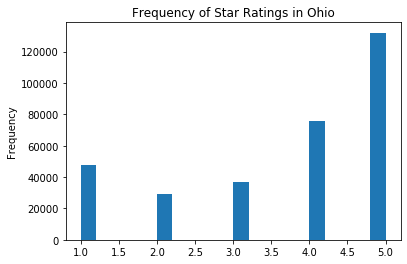

In [10]:
# Check the distribution of stars by frequency
# Distribution skews right
reviews.stars.plot(kind='hist', bins=20, title = 'Frequency of Star Ratings in Ohio');

In [17]:
reviews.stars.value_counts()

5    131987
4     75886
1     47555
3     36755
2     29162
Name: stars, dtype: int64

In [22]:
1- (131987+47555)/len(reviews)

0.4412796215905024

In [13]:
# 43% of business reviews for AZ are given 5 stars
reviews.stars.value_counts(normalize=True)

5    0.410733
4    0.236151
1    0.147987
3    0.114379
2    0.090750
Name: stars, dtype: float64

In [12]:
reviews.stars.mean()

3.6708926543123432

In [13]:
reviews.stars.std()

1.453166241592989

In [14]:
# calculate the mean star rating by hand
stars_df = pd.DataFrame(reviews.stars.value_counts())
stars_df.reset_index(level=0, inplace=True)
stars_df.columns = ['stars', 'review_count']
stars_df['stars_x_review_count'] = stars_df.stars*stars_df.review_count
stars_df.stars_x_review_count.sum() / stars_df.review_count.sum()

3.6708926543123432

In [15]:
# Pull a view of the business

In [16]:
# Get various compontent of business_id aggregate data and put into a datframe 
business_df = reviews.groupby('business_id').stars.agg(['count', 'mean', 'min', 'max','std']).reset_index()
business_df.rename(columns={'count':'biz_review_count', 'mean':'biz_star_mean', 'max':'biz_star_max', 'min':'biz_star_min','std':'biz_star_std'}, inplace=True)
# create columns for the earliest and latest reviews by business_id and create a new dataframe
earliest_to_latest = reviews.groupby('business_id').agg({'datetime': [np.min,np.max]})
# change the name of the columns
earliest_to_latest.columns = ['earliest_review', 'latest_review']
# reset the index
earliest_to_latest.reset_index(level=0, inplace=True)
# import datetime and timedelta
import datetime
from datetime import timedelta
# subtract the earlest review from the latest review to get the time delta
earliest_to_latest['earliest_to_latest'] = earliest_to_latest['latest_review'] - earliest_to_latest['earliest_review']
# convert timedelta into seconds
datetime.timedelta(seconds=24*60*60).total_seconds()
# and then into years
earliest_to_latest['earliest_to_latest_years'] = (earliest_to_latest['earliest_to_latest'].dt.total_seconds() / 31536000).round(2)
earliest_to_latest.head(1)
# merge columns into a new the reviews dataframe but create as a new dataframe 
business_all_df = business_df.merge(earliest_to_latest, on='business_id', how='left')
# Add useful to the new dataframe 
business_useful = pd.DataFrame(reviews.groupby('business_id').useful.sum())
business_useful.reset_index(level=0, inplace=True)
business_all_df = business_all_df.merge(business_useful, on='business_id', how='left')
business_all_df.head(1)

,business_id,biz_review_count,biz_star_mean,biz_star_min,biz_star_max,biz_star_std,earliest_review,latest_review,earliest_to_latest,earliest_to_latest_years,useful
0,--EF5N7P70J_UYBTPypYlA,7,2.857143,1,5,1.772811,2017-08-25 21:44:12,2018-11-05 20:00:59,436 days 22:16:47,1.2,8


In [17]:
# Check to see if the review is a one and add as a new columns to indicate whether true
def is_it_a_one (i):
    if i == 1:
        return 1
    else:
        return 0
reviews['is_it_a_one'] = reviews['stars'].apply(is_it_a_one)

# Check to see if the review is a five and add as a new columns to indicate whether true
def is_it_a_five (i):
    if i == 5:
        return 1
    else:
        return 0
reviews['is_it_a_five'] = reviews['stars'].apply(is_it_a_five)

# Check to see if the review is a five and add as a new columns to indicate whether true
def is_it_a_one_or_two (i):
    if i == 1 or i ==2:
        return 1
    else:
        return 0
reviews['is_it_a_one_or_two'] = reviews['stars'].apply(is_it_a_one_or_two)

# Check to see if the review is a five and add as a new columns to indicate whether true
def is_it_a_four_or_five (i):
    if i == 4 or i ==5:
        return 1
    else:
        return 0
reviews['is_it_a_four_or_five'] = reviews['stars'].apply(is_it_a_four_or_five)

# Check to see if the review is a five and add as a new columns to indicate whether true
def is_it_a_one_or_five (i):
    if i == 1 or i ==5:
        return 1
    else:
        return 0
reviews['is_it_a_one_or_five'] = reviews['stars'].apply(is_it_a_one_or_five)



In [18]:
reviews.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,datetime,year,is_it_a_one,is_it_a_five,is_it_a_one_or_two,is_it_a_four_or_five,is_it_a_one_or_five
0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18,2015-01-18 14:04:18,2015,0,0,1,0,0


In [19]:
# Create a dataframe for counting if reviews are a one by business_id
is_it_a_one = pd.DataFrame(reviews.groupby('business_id').is_it_a_one.sum())
is_it_a_one.reset_index(level=0, inplace=True)
# merge this into the business_all_df dataframe
business_all_df = business_all_df.merge(is_it_a_one, on='business_id', how='left')
business_all_df
# find ones as a percentage of totals 
business_all_df['percent_is_it_a_one']= business_all_df['is_it_a_one'] / business_all_df['biz_review_count'].round()

# Create a dataframe for counting if reviews are a five by business_id
is_it_a_five = pd.DataFrame(reviews.groupby('business_id').is_it_a_five.sum())
is_it_a_five.reset_index(level=0, inplace=True)
# merge this into the business_all_df dataframe
business_all_df = business_all_df.merge(is_it_a_five, on='business_id', how='left')
business_all_df
# find ones as a percentage of totals 
business_all_df['percent_is_it_a_five']= business_all_df['is_it_a_five'] / business_all_df['biz_review_count'].round()
business_all_df.head(5)


,business_id,biz_review_count,biz_star_mean,biz_star_min,biz_star_max,biz_star_std,earliest_review,latest_review,earliest_to_latest,earliest_to_latest_years,useful,is_it_a_one,percent_is_it_a_one,is_it_a_five,percent_is_it_a_five
0,--EF5N7P70J_UYBTPypYlA,7,2.857143,1,5,1.772811,2017-08-25 21:44:12,2018-11-05 20:00:59,436 days 22:16:47,1.20,8,2,0.285714,2,0.285714
1,--I7YYLada0tSLkORTHb5Q,100,3.470000,1,5,1.359256,2014-11-05 18:57:45,2018-10-31 00:49:17,1455 days 05:51:32,3.99,37,12,0.120000,29,0.290000
2,--Ni3oJ4VOqfOEu7Sj2Vzg,6,2.000000,1,5,1.549193,2014-08-02 15:56:13,2017-05-18 20:10:04,1020 days 04:13:51,2.80,6,3,0.500000,1,0.166667
3,--S62v0QgkqQaVUhFnNHrw,43,2.023256,1,5,1.471772,2011-06-19 14:45:24,2018-11-06 16:57:07,2697 days 02:11:43,7.39,25,27,0.627907,4,0.093023
4,--i1tTcggBi4cPkd-h5hDg,22,4.727273,3,5,0.550482,2008-08-14 22:31:05,2018-08-15 19:04:38,3652 days 20:33:33,10.01,25,0,0.000000,17,0.772727


In [20]:
#export to csv
business_all_df.to_csv('business_all_df.csv')

In [21]:
reviews[reviews.business_id == '-01XupAWZEXbdNbxNg5mEg'].is_it_a_one.sum()

0

In [22]:
len(reviews[reviews.business_id == '-01XupAWZEXbdNbxNg5mEg'])

0

In [23]:
# MERGING business_df INTO A NEW DF WITH review_ID AS THE OBSERVATIONS

In [24]:
# merge columns into a new the reviews dataframe but create as a new dataframe 
a = reviews.merge(business_df, on='business_id', how='left')
# create a column for the absolute difference between the user's rating and the mean for the business
a['difference_from_mean'] = abs(a['stars'] - a['biz_star_mean'])
a.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,datetime,...,is_it_a_five,is_it_a_one_or_two,is_it_a_four_or_five,is_it_a_one_or_five,biz_review_count,biz_star_mean,biz_star_min,biz_star_max,biz_star_std,difference_from_mean
0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18,2015-01-18 14:04:18,...,0,1,0,0,60,3.866667,1,5,1.371213,1.866667


In [25]:
# Extract the aggregate average difference the user is from businesss aggregate star erating
b = pd.DataFrame(a.groupby('user_id').difference_from_mean.mean())
b.reset_index(inplace = True)
b.columns = ['user_id', 'av_difference_from_mean']
b

,user_id,av_difference_from_mean
0,--6CV8BPNofy7jt1JavD-g,1.262590
1,--9Et6koJ2Apqk4nxuv3TQ,0.828194
2,--Awhttr0FhVud5prVpVlA,0.171111
3,--J8UruLD_xvVuI1lMAxpA,1.194130
4,--OifHfYcX6tFOdcVCqXsA,1.622222
...,...,...
92617,zzgi9fDTYmRnkBc6CPc7yA,1.137993
92618,zzl6azYULIhTlQthZv8LUA,0.375000
92619,zzqEHVtLUCaXCW1vPRSFEw,2.448953
92620,zzsPf8xNW11nd0B6MZqfRw,0.095238


In [26]:
# Pull review count 
c = pd.DataFrame(a.groupby('user_id').biz_review_count.count())
c.reset_index(inplace = True)
c.columns = ['user_id', 'review_count']
c

,user_id,review_count
0,--6CV8BPNofy7jt1JavD-g,1
1,--9Et6koJ2Apqk4nxuv3TQ,3
2,--Awhttr0FhVud5prVpVlA,1
3,--J8UruLD_xvVuI1lMAxpA,2
4,--OifHfYcX6tFOdcVCqXsA,2
...,...,...
92617,zzgi9fDTYmRnkBc6CPc7yA,1
92618,zzl6azYULIhTlQthZv8LUA,1
92619,zzqEHVtLUCaXCW1vPRSFEw,2
92620,zzsPf8xNW11nd0B6MZqfRw,1


In [27]:
# Pull review count 
cc = pd.DataFrame(a.groupby('user_id').biz_review_count.sum())
c = c.merge(cc, left_on='user_id', right_on='user_id')

In [28]:
d = c.merge(b, left_on='user_id', right_on='user_id')
d

,user_id,review_count,biz_review_count,av_difference_from_mean
0,--6CV8BPNofy7jt1JavD-g,1,278,1.262590
1,--9Et6koJ2Apqk4nxuv3TQ,3,148,0.828194
2,--Awhttr0FhVud5prVpVlA,1,450,0.171111
3,--J8UruLD_xvVuI1lMAxpA,2,196,1.194130
4,--OifHfYcX6tFOdcVCqXsA,2,23,1.622222
...,...,...,...,...
92617,zzgi9fDTYmRnkBc6CPc7yA,1,558,1.137993
92618,zzl6azYULIhTlQthZv8LUA,1,8,0.375000
92619,zzqEHVtLUCaXCW1vPRSFEw,2,339,2.448953
92620,zzsPf8xNW11nd0B6MZqfRw,1,126,0.095238


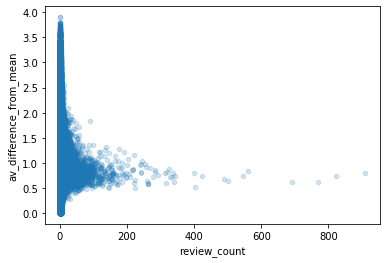

In [29]:
d.plot(kind = 'scatter', x='review_count', y='av_difference_from_mean', alpha= 0.2);

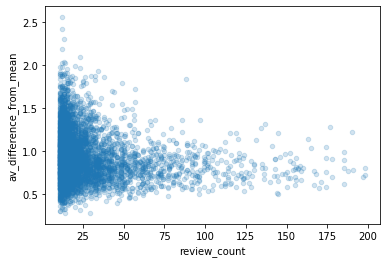

In [30]:
e = d[(d.review_count > 10) & (d.review_count < 200)]
e.plot(kind = 'scatter', x='review_count', y='av_difference_from_mean', alpha= 0.2);

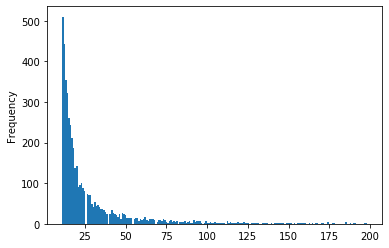

In [31]:
e = d[(d.review_count > 10) & (d.review_count < 200)]
e.review_count.plot(kind='hist', bins=200);

In [32]:
# Create segments based on the number of reviews a user has done
criteria = [d['review_count'].between(1,1), d['review_count'].between(2, 2), d['review_count'].between(3,4), d['review_count'].between(5,10), d['review_count'].between(11,2000)]
values = ['1', '2', '3-4', '5-10', '11+']

d['segments'] = np.select(criteria, values, 0)
d.segments.value_counts(normalize=True)


1       0.582572
2       0.156723
3-4     0.119021
5-10    0.090281
11+     0.051402
Name: segments, dtype: float64

In [33]:
d.groupby('segments').review_count.sum()

segments
1        53959
11+     145503
2        29032
3-4      37064
5-10     55787
Name: review_count, dtype: int64

In [34]:
f = d.groupby('segments').review_count.sum()

In [35]:
len(reviews)/ len(d)

3.4694241109023776

In [36]:
537/1191

0.4508816120906801

In [37]:
len(reviews)

321345

In [38]:
g = d[d.segments == '1']

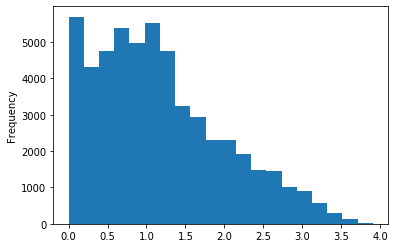

In [39]:
g.av_difference_from_mean.plot(kind='hist', bins=20);

In [40]:
h = d[d.segments == '11+']

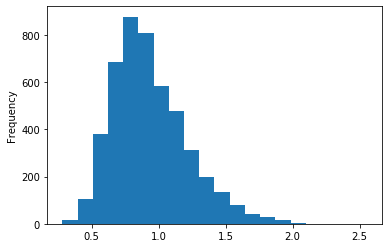

In [41]:
h.av_difference_from_mean.plot(kind='hist', bins=20);

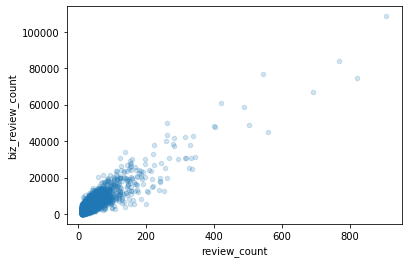

In [42]:
h.plot(kind = 'scatter', x='review_count', y='biz_review_count', alpha= 0.2);


In [43]:
h.corr()

,review_count,biz_review_count,av_difference_from_mean
review_count,1.000000,0.904284,-0.135872
biz_review_count,0.904284,1.000000,-0.219945
av_difference_from_mean,-0.135872,-0.219945,1.000000


In [44]:
h.head(1)

,user_id,review_count,biz_review_count,av_difference_from_mean,segments
16,--amZ_cR9Zgu4B1RrAHJyA,11,5044,0.805209,11+


In [45]:
a.corr()

,stars,useful,funny,cool,is_it_a_one,is_it_a_five,is_it_a_one_or_two,is_it_a_four_or_five,is_it_a_one_or_five,biz_review_count,biz_star_mean,biz_star_min,biz_star_max,biz_star_std,difference_from_mean
stars,1.000000,-0.081329,-0.035882,0.121443,-0.766004,0.763606,-0.882794,0.897922,0.208785,0.094604,0.509697,0.194729,0.198722,-0.253243,-0.408741
useful,-0.081329,1.000000,0.575861,0.644702,0.083483,-0.045767,0.082572,-0.064491,0.014355,-0.030092,-0.051001,0.012248,-0.030407,0.009542,0.007139
funny,-0.035882,0.575861,1.000000,0.689199,0.026298,-0.031549,0.030376,-0.029991,-0.012453,-0.004417,-0.011248,0.002431,-0.008975,-0.008807,0.019039
cool,0.121443,0.644702,0.689199,1.000000,-0.097443,0.068311,-0.120459,0.119087,-0.002002,0.027823,0.090321,0.038380,0.023901,-0.070606,-0.084861
is_it_a_one,-0.766004,0.083483,0.026298,-0.097443,1.000000,-0.347947,0.744212,-0.564084,0.370381,-0.118451,-0.418637,-0.121600,-0.207350,0.211697,0.514346
is_it_a_five,0.763606,-0.045767,-0.031549,0.068311,-0.347947,1.000000,-0.467538,0.616835,0.741965,0.024397,0.385315,0.198523,0.120998,-0.184367,-0.012753
is_it_a_one_or_two,-0.882794,0.082572,0.030376,-0.120459,0.744212,-0.467538,1.000000,-0.757962,0.068972,-0.106765,-0.445199,-0.146335,-0.183547,0.228511,0.530900
is_it_a_four_or_five,0.897922,-0.064491,-0.029991,0.119087,-0.564084,0.616835,-0.757962,1.000000,0.207764,0.079293,0.444962,0.166849,0.161888,-0.219094,-0.373954
is_it_a_one_or_five,0.208785,0.014355,-0.012453,-0.002002,0.370381,0.741965,0.068972,0.207764,1.000000,-0.060534,0.082390,0.109736,-0.028397,-0.031280,0.355186
biz_review_count,0.094604,-0.030092,-0.004417,0.027823,-0.118451,0.024397,-0.106765,0.079293,-0.060534,1.000000,0.185608,-0.179176,0.095868,-0.120314,-0.055951


In [46]:
# TIME BETWEEN THE FIRST AND THE LAST REVIEW WRITTEN 

In [47]:
earliest_to_latest = reviews.groupby('business_id').agg({'datetime': [np.min,np.max]})
earliest_to_latest.columns = ['earliest_review', 'latest_review']
earliest_to_latest.reset_index(level=0, inplace=True)
import datetime
from datetime import timedelta
earliest_to_latest['earliest_to_latest'] = earliest_to_latest['latest_review'] - earliest_to_latest['earliest_review']
earliest_to_latest
datetime.timedelta(seconds=24*60*60).total_seconds()
earliest_to_latest['earliest_to_latest_years'] = (earliest_to_latest['earliest_to_latest'].dt.total_seconds() / 31536000).round(2)
earliest_to_latest

,business_id,earliest_review,latest_review,earliest_to_latest,earliest_to_latest_years
0,--EF5N7P70J_UYBTPypYlA,2017-08-25 21:44:12,2018-11-05 20:00:59,436 days 22:16:47,1.20
1,--I7YYLada0tSLkORTHb5Q,2014-11-05 18:57:45,2018-10-31 00:49:17,1455 days 05:51:32,3.99
2,--Ni3oJ4VOqfOEu7Sj2Vzg,2014-08-02 15:56:13,2017-05-18 20:10:04,1020 days 04:13:51,2.80
3,--S62v0QgkqQaVUhFnNHrw,2011-06-19 14:45:24,2018-11-06 16:57:07,2697 days 02:11:43,7.39
4,--i1tTcggBi4cPkd-h5hDg,2008-08-14 22:31:05,2018-08-15 19:04:38,3652 days 20:33:33,10.01
...,...,...,...,...,...
14692,zydbdBR6-CM8UZ6WkW1DWA,2013-11-02 21:38:11,2018-11-11 11:17:17,1834 days 13:39:06,5.03
14693,zz6S_y6C39iRU3h81Z1e2A,2010-01-20 01:35:00,2018-05-02 18:50:12,3024 days 17:15:12,8.29
14694,zzSYBWuv_fXGtSgsO-6_1g,2011-11-24 05:53:30,2018-11-10 00:20:28,2542 days 18:26:58,6.97
14695,zzSbDY2Ztja3Htt8bsQ6Aw,2011-04-11 01:29:36,2017-10-10 18:07:38,2374 days 16:38:02,6.51


In [48]:
# NLP 

In [49]:
from __future__ import unicode_literals # unicode handling
import pandas as pd
import numpy as np
import scipy as sp
import json
import spacy # pre-processing and traditional NLP stemming
import codecs # unicode handling
from scipy.sparse import hstack # stack arrays in sequence horizontally
from gensim.models.word2vec import Word2Vec # Gensim is used for LDA and word2vec
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # information retrieval
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA # principal component analysis
from sklearn import metrics

nlp_toolkit = spacy.load('en_core_web_sm')
%matplotlib inline

In [50]:
reviews.dtypes

review_id                       object
user_id                         object
business_id                     object
stars                            int64
useful                           int64
funny                            int64
cool                             int64
text                            object
date                            object
datetime                datetime64[ns]
year                     period[A-DEC]
is_it_a_one                      int64
is_it_a_five                     int64
is_it_a_one_or_two               int64
is_it_a_four_or_five             int64
is_it_a_one_or_five              int64
dtype: object

In [51]:
# Create a new DataFrame that only contains the 5-star and 1-star reviews.
reviews_best_worst = reviews[(reviews.stars==5) | (reviews.stars==1)]

# Define X and y.
X = reviews.text
y = reviews.stars

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [52]:
X_train.shape

(241008,)

In [53]:
X_train

135038    Best Tailor I've ever had! Very reasonable pri...
321210    I don't like to bash companies, but this drug ...
260614    Would rate a zero if I could. Service is terri...
177660    I tried this place because of all the good rev...
137331    There are a few areas I would like to review w...
                                ...                        
117583    This store, has excellent customer service and...
73349     This Starbucks has improved markedly as far as...
312201    Pulled pork was a little dry and lacked any sm...
267336    We went there with friends.  First time.  The ...
128037    Pros: looks very authentic when you enter.  Th...
Name: text, Length: 241008, dtype: object

In [ ]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [ ]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
X_train_dtm.shape

In [ ]:
y_train.shape

In [ ]:
# Start at 50 features
print((vect.get_feature_names()[50:]))

In [59]:
# Show vectorizer options.
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [60]:
# Don't convert to lowercase.
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape
vect.get_feature_names()[50:]

['02pm',
 '03',
 '0303',
 '032',
 '0356',
 '03pm',
 '04',
 '0402100',
 '04Aug18',
 '04am',
 '04pm',
 '05',
 '0500',
 '0568',
 '059',
 '05am',
 '05cents',
 '05oz',
 '05p',
 '05pm',
 '05sec',
 '06',
 '0600',
 '063',
 '0630',
 '0663',
 '069',
 '06PM',
 '06am',
 '06pm',
 '07',
 '0700',
 '0705',
 '0730',
 '07AM',
 '07am',
 '08',
 '0815',
 '088',
 '0880',
 '08PM',
 '08am',
 '08pm',
 '09',
 '0900',
 '0930',
 '095',
 '098',
 '09AM',
 '09pm',
 '0FA',
 '0FF',
 '0K',
 '0SNU32',
 '0Z',
 '0_o',
 '0f',
 '0mg',
 '0mi',
 '0ne',
 '0piece',
 '0ver',
 '0youcKV6',
 '0z',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000000',
 '10000000000000',
 '1000000k',
 '100000946037294',
 '100000x',
 '100001639650669',
 '100003246585259',
 '1000mi',
 '1000mile',
 '1000s',
 '1000x',
 '1004',
 '10091',
 '100A',
 '100K',
 '100MPH',
 '100X',
 '100am',
 '100cal',
 '100db',
 '100ft',
 '100hours',
 '100k',
 '100lbs',
 '100mL',
 '100mbps',
 '100miles',
 '100pm',
 '100s',
 '100some',
 '100th',
 '100w',
 '100x',
 '100year',


In [61]:
# Use default options for CountVectorizer.
vect = CountVectorizer()

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Random Forest classifier to predict the star rating.
rf = RandomForestClassifier(n_estimators = 20)
rf.fit(X_train_dtm, y_train)

# Calculate test accuracy using area under the curve.
scores = cross_val_score(rf, X_test_dtm, y_test, cv = 5, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

ValueError: multiclass format is not supported

In [ ]:
vect.vocabulary_

In [ ]:
# Finally, let's convert the sparse matrix to a typical ndarray using .toarray()
#   - Remember, this takes up a lot more memory than the sparse matrix! However, this conversion is sometimes necessary.

X_test_dtm.toarray()

In [ ]:
# Include 1-grams and 2-grams.
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

In [ ]:
# Remove English stop words
vect = CountVectorizer(stop_words = 'english')
X_train_dtm = vect.fit_transform(X_train)

# Set of stop words
#print((vect.get_stop_words()))

In [ ]:
reviews['totalwords'] = reviews['text'].str.split().str.len()

In [ ]:
reviews